# Richmond Marathon Anaysis: Most Improvement from 2018-2019

This Notebook takes information posted by the Richmond Marathon, creates a .csv file for each of them, creates data frames from each, and adds columns for race year. Then the data frames are merged based on names appearing in both years race results, filters for results where the age difference is not plausibly the same runner, then sorts by most imporoved time. This process will only recognize times as belonging to the same runner when the race recorded the same name.

To run this notebook, upload RichmondMarathon2018.csv and RichmondMarathon2019D.csv, then use Cell- Run All. The output will be a .csv file named Richmond_Improved.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('RichmondMarathon2018.csv')  #imports .csv's to data frames
df2 = pd.read_csv('RichmondMarathon2019D.csv')

In [3]:
df1 = df1.rename(columns = lambda x: x.strip()) #removes spaces from column names so they can be merged
df2 = df2.rename(columns = lambda x: x.strip())
df1['Name'] = df1['Name'].str.strip() #erases spaces
df2['Name'] = df2['Name'].str.strip()
df1['Age'] = df1['Age'].astype(str).str.strip().astype('int64') #erases spaces, changes to int
df2['Age'] = df2['Age'].astype(str).str.strip().astype('int64', errors='ignore')
df1['Net'] = pd.to_timedelta(df1['Net']) #changes type to time
df2['Net'] = pd.to_timedelta(df2['Net'])

In [4]:
df1['Race_Year'] = 2018 #adds a column for race year
df2['Race_Year'] = 2019
df1['Net_In_Hours'] = df1['Net'] / np.timedelta64(1,'h') #adds a column for hours, to make it easier to plot 
df2['Net_In_Hours'] = df2['Net'] / np.timedelta64(1,'h')

In [5]:
merged_inner = pd.merge(left=df1, right=df2, left_on='Name', right_on='Name') #merges the data frames based on runner name
merged_inner['Age_Difference'] = ((merged_inner['Age_y'].astype('int32')) - (merged_inner['Age_x'].astype('int32')))
print(len(merged_inner)) #number of runners both year with the same name 
merged_inner = merged_inner[merged_inner.Age_Difference >= 0] #filters runners with the same name but aged backwords 
merged_inner = merged_inner[merged_inner.Age_Difference < 3] #filters runners with the same nave and age difference more than 3
print(len(merged_inner)) #number of runners after filters

728
709


In [6]:
merged_inner['Compare_Years']=pd.Series(merged_inner['Net_y']-merged_inner['Net_x']) #makes a column for differnce in race time
most_improved = merged_inner[merged_inner.Age_Difference <3].sort_values('Compare_Years') #sorts field by change in race time
display(most_improved)

,Bib_x,Name,Sex_x,Age_x,"City, State_x",Net_x,Clock_x,Pace,Race_Year_x,Net_In_Hours_x,Bib_y,Sex_y,Age_y,"City, State_y",Net_y,Clock_y,Race_Year_y,Net_In_Hours_y,Age_Difference,Compare_Years
419,935,KEVAUGHN SMITH,M,41,"NEWARK, NJ",06:03:06,06:06:13,13:50 /mi,2018,6.051667,6172,M,42,"NEWARK, NJ",04:15:08,04:16:48,2019,4.252222,1,-1 days +22:12:02
18,8517,ALLEN MA,M,49,"GLEN ALLEN, VA",04:57:31,04:59:07,11:20 /mi,2018,4.958611,3152,M,50,"GLEN ALLEN, VA",03:27:27,03:30:34,2019,3.457500,1,-1 days +22:29:56
610,2000,SAMUEL LIAN,M,25,"HENRICO, VA",05:54:02,05:55:11,13:30 /mi,2018,5.900556,5880,M,26,"HENRICO, VA",04:29:03,04:33:47,2019,4.484167,1,-1 days +22:35:01
559,4630,PATRICK BOYD,M,52,"VIRGINIA BEACH, VA",06:23:20,06:30:18,14:37 /mi,2018,6.388889,912,M,53,"VIRGINIA BEACH, VA",05:00:20,05:04:31,2019,5.005556,1,-1 days +22:37:00
702,7302,VICTORIA HEBERT,F,24,"LYNCHBURG, VA",06:34:33,06:44:55,15:02 /mi,2018,6.575833,5425,F,25,"LYNCHBURG, VA",05:17:21,05:19:27,2019,5.289167,1,-1 days +22:42:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,2049,LISA CURTIN,F,38,"MOSELEY, VA",03:47:12,03:48:56,8:39 /mi,2018,3.786667,4382,F,39,"REISTERSTOWN, MD",05:22:27,05:27:53,2019,5.374167,1,01:35:15
648,5357,SIVASUBRAMANIAN SIVARAJ,M,35,"CHANTILLY, VA",04:34:58,04:36:55,10:29 /mi,2018,4.582778,1006,M,36,"CHANTILLY, VA",06:27:41,06:29:54,2019,6.461389,1,01:52:43
428,4747,KIM ENGLEMAN,F,46,"RICHMOND, VA",04:52:40,04:59:22,11:09 /mi,2018,4.877778,2855,F,47,"RICHMOND, VA",06:45:59,06:54:03,2019,6.766389,1,01:53:19
173,6660,DAWN WALKER,F,47,"RICHMOND, VA",04:50:20,04:57:16,11:04 /mi,2018,4.838889,2856,F,48,"RICHMOND, VA",07:17:50,07:24:50,2019,7.297222,1,02:27:30


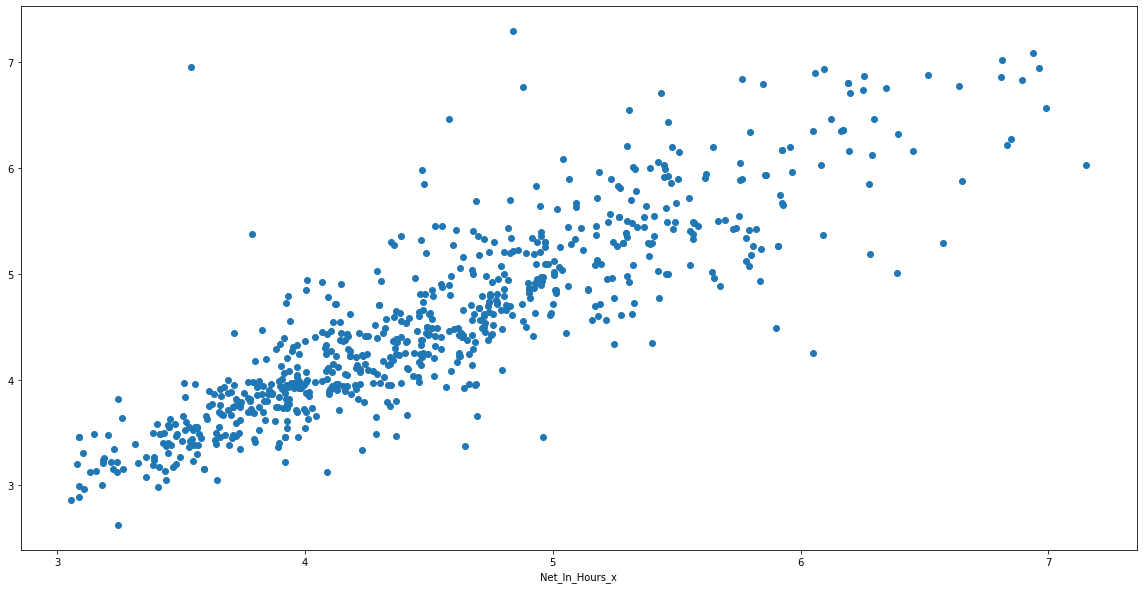

In [7]:
most_improved.plot(x='Net_In_Hours_x', y='Net_In_Hours_y', style='o', legend=None, figsize=(20,10)) # plots 2018 time on x axis and 2019 on y axis


In [8]:
most_improved.to_csv('Richmond_Improved.csv')  # outputs .csv version

In [9]:
from IPython.display import FileLink
FileLink('./Richmond_Improved.csv', result_html_prefix="Click here to download: ")

/work/Richmond_Improved.csv